# Converting Python 2 to Python 3 automatically!

## Steps to convert
- Save the file with python2 script
- Run the following command in the command promt
- "python (path of the python2 file) (file name)"

# Working with SQlite3

## Importing SQlite3

In [1]:
import sqlite3

## Connection to the database

In [2]:
conn = sqlite3.connect('Files/pydatabase1.db')
c = conn.cursor()

## Creating table

In [3]:
def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS sampleTable(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")


## Inserting values into the table

In [4]:
def data_entry():
    c.execute("INSERT INTO sampleTable VALUES(123456789, '2020-07-20', 'Python', 8)")
    conn.commit()

In [5]:
create_table()
data_entry()

## Inserting variables into database table

In [6]:
import time
import datetime
import random

In [7]:
def dynamic_data_entry():
    unix = time.time()
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = 'Python'
    value = random.randrange(0,10)
    c.execute("INSERT INTO sampleTable (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",(unix, date, keyword, value))
    conn.commit()

In [8]:
for i in range(10):
    dynamic_data_entry()
    time.sleep(1)

## Reading from database

### Reading the entire database

In [9]:
def read_from_db():
    c.execute('SELECT * FROM sampleTable')
    for row in c.fetchall():
        print(row)

In [10]:
read_from_db()

(123456789.0, '2020-07-20', 'Python', 8.0)
(1595870468.1643956, '2020-07-27 22:51:08', 'Python', 0.0)
(1595870470.1838937, '2020-07-27 22:51:10', 'Python', 4.0)
(1595870471.1903734, '2020-07-27 22:51:11', 'Python', 6.0)
(1595870473.317607, '2020-07-27 22:51:13', 'Python', 1.0)
(1595870474.3251693, '2020-07-27 22:51:14', 'Python', 7.0)
(1595870475.3322113, '2020-07-27 22:51:15', 'Python', 0.0)
(1595870476.3403306, '2020-07-27 22:51:16', 'Python', 1.0)
(1595870477.3495727, '2020-07-27 22:51:17', 'Python', 5.0)
(1595870501.6498156, '2020-07-27 22:51:41', 'Python', 0.0)
(1595870503.6637058, '2020-07-27 22:51:43', 'Python', 0.0)
(1595870504.6707644, '2020-07-27 22:51:44', 'Python', 1.0)
(1595870505.6778984, '2020-07-27 22:51:45', 'Python', 5.0)
(1595870506.6848996, '2020-07-27 22:51:46', 'Python', 7.0)
(1595870507.6922557, '2020-07-27 22:51:47', 'Python', 0.0)
(1595870508.6997373, '2020-07-27 22:51:48', 'Python', 4.0)
(1595870509.7071733, '2020-07-27 22:51:49', 'Python', 2.0)
(123456789.0, 

### Reading the database by filtering it

In [11]:
def read_from_db():
    c.execute('SELECT * FROM sampleTable WHERE value=3')
    for row in c.fetchall():
        print(row)
read_from_db()

(1595873063.1070323, '2020-07-27 23:34:23', 'Python', 3.0)
(1595873065.121141, '2020-07-27 23:34:25', 'Python', 3.0)


In [12]:
def read_from_db():
    c.execute("SELECT * FROM sampleTable WHERE value=3 AND keyword='Python'")
    for row in c.fetchall():
        print(row)
read_from_db()

(1595873063.1070323, '2020-07-27 23:34:23', 'Python', 3.0)
(1595873065.121141, '2020-07-27 23:34:25', 'Python', 3.0)


### Reading specific column

In [13]:
def read_from_db():
    c.execute("SELECT keyword FROM sampleTable WHERE value=3 AND keyword='Python'")
    for row in c.fetchall():
        print(row)
read_from_db()

('Python',)
('Python',)


## Graph from database table

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as madates
from matplotlib import style
style.use('fivethirtyeight')

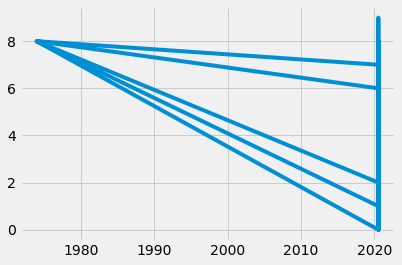

In [15]:
def graph_data():
    c.execute('SELECT unix, value from sampleTable')
    dates = []
    values = []
    for row in c.fetchall():
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
        
    plt.plot_date(dates, values, '-')
    plt.show()
    
graph_data()

## UPDATE and DELETE

In [16]:
def del_and_update():
    print(20 * "#","Data before update", 20 * "#")
    
    c.execute('SELECT * FROM sampleTable')
    [print(row) for row in c.fetchall()]
    
    
    c.execute('UPDATE sampleTable SET value = 12 WHERE value = 9')
    conn.commit()
    
    print(20 * "#","Data after update", 20 * "#")
    
    c.execute('SELECT * FROM sampleTable')
    [print(row) for row in c.fetchall()]
    
    print(20 * "#","Data after delete", 20 * "#")
          
    c.execute('DELETE FROM sampleTable where value = 12')
    
    c.execute('SELECT * FROM sampleTable')
    [print(row) for row in c.fetchall()]
    conn.commit()

In [17]:
del_and_update()

#################### Data before update ####################
(123456789.0, '2020-07-20', 'Python', 8.0)
(1595870468.1643956, '2020-07-27 22:51:08', 'Python', 0.0)
(1595870470.1838937, '2020-07-27 22:51:10', 'Python', 4.0)
(1595870471.1903734, '2020-07-27 22:51:11', 'Python', 6.0)
(1595870473.317607, '2020-07-27 22:51:13', 'Python', 1.0)
(1595870474.3251693, '2020-07-27 22:51:14', 'Python', 7.0)
(1595870475.3322113, '2020-07-27 22:51:15', 'Python', 0.0)
(1595870476.3403306, '2020-07-27 22:51:16', 'Python', 1.0)
(1595870477.3495727, '2020-07-27 22:51:17', 'Python', 5.0)
(1595870501.6498156, '2020-07-27 22:51:41', 'Python', 0.0)
(1595870503.6637058, '2020-07-27 22:51:43', 'Python', 0.0)
(1595870504.6707644, '2020-07-27 22:51:44', 'Python', 1.0)
(1595870505.6778984, '2020-07-27 22:51:45', 'Python', 5.0)
(1595870506.6848996, '2020-07-27 22:51:46', 'Python', 7.0)
(1595870507.6922557, '2020-07-27 22:51:47', 'Python', 0.0)
(1595870508.6997373, '2020-07-27 22:51:48', 'Python', 4.0)
(1595870509.

In [18]:
c.close()
conn.close()